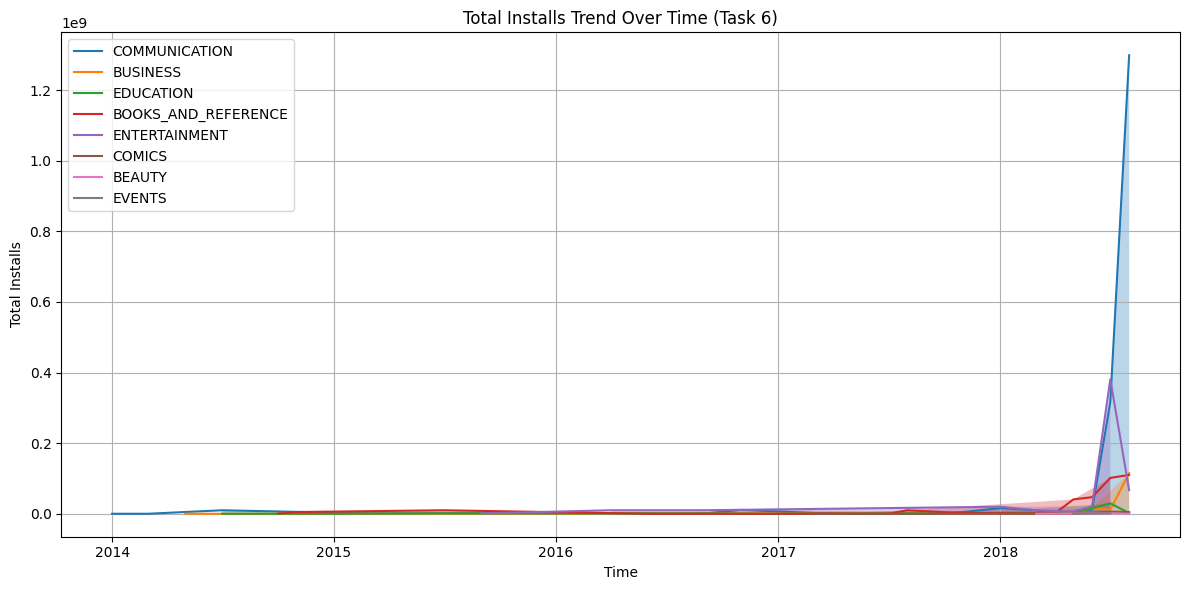

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

# ---------------- LOAD DATASET ----------------
file_path = r"C:\Users\user\Downloads\Google Playstore Apps.csv"
df = pd.read_csv(file_path)

# ---------------- DATA CLEANING ----------------
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df['Installs'] = (
    df['Installs']
    .astype(str)
    .str.replace(',', '')
    .str.replace('+', '')
    .astype(float)
)

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# ---------------- FILTER CONDITIONS ----------------
df = df[
    (df['Reviews'] > 500) &
    (~df['App'].str.lower().str.startswith(('x', 'y', 'z'))) &
    (~df['App'].str.contains('s', case=False, na=False)) &
    (df['Category'].str.startswith(('E', 'C', 'B')))
]

# ---------------- CATEGORY TRANSLATION ----------------
category_translation = {
    'Beauty': 'सौंदर्य',        # Hindi
    'Business': 'வணிகம்',       # Tamil
    'Dating': 'Partnersuche'    # German
}

df['Category_Display'] = df['Category'].replace(category_translation)

# ---------------- MONTHLY AGGREGATION ----------------
df['Month'] = df['Last Updated'].dt.to_period('M').dt.to_timestamp()

monthly_data = (
    df.groupby(['Month', 'Category_Display'])['Installs']
    .sum()
    .reset_index()
    .sort_values('Month')
)

# ---------------- TIME CHECK (LOGIC PURPOSE) ----------------
ist = pytz.timezone("Asia/Kolkata")
current_hour = datetime.now(ist).hour
time_allowed = 18 <= current_hour < 21

# ---------------- TIME SERIES LINE CHART ----------------
plt.figure(figsize=(12, 6))

for category in monthly_data['Category_Display'].unique():
    data = monthly_data[monthly_data['Category_Display'] == category].copy()
    data['Growth'] = data['Installs'].pct_change()

    plt.plot(data['Month'], data['Installs'], label=category)

    # Highlight growth > 20%
    high_growth = data[data['Growth'] > 0.20]
    plt.fill_between(
        high_growth['Month'],
        high_growth['Installs'],
        alpha=0.3
    )

plt.title("Total Installs Trend Over Time (Task 6)")
plt.xlabel("Time")
plt.ylabel("Total Installs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()